# Answers to questions
What is the average human life expectancy in the world?<br /> 
How does this differ between low-, medium, and high-income countries? <br />
What characteristics of countries are predictors for differences in life expectancies? <br />
What characteristics are predictors for changes in life expectancy in a country over time?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/processed/data_flat_clean.csv')

### 1. What is the average human life expectancy in the world?

In [3]:
tot_population = data["Population, total"].sum()
data["pop_weight"] = (data["Population, total"] / tot_population)
data["LE_both_weighted"] = (data["LE_both"] * data["pop_weight"])
data["LE_female_weighted"] = (data["LE_female"] * data["pop_weight"])
data["LE_male_weighted"] = (data["LE_male"] * data["pop_weight"])

print("The unweighted average life expectancy for both sexes is: {0}".format(data['LE_both'].mean()))
print("The unweighted average life expectancy for women is : {0}".format(data['LE_female'].mean()))
print("The unweighted average life expectancy for men is : {0}".format(data['LE_male'].mean()))

print("The weighted average life expectancy for both sexes is: {0}".format(data['LE_both_weighted'].sum()))
print("The weighted average life expectancy for women is : {0}".format(data['LE_female_weighted'].sum()))
print("The weighted average life expectancy for men is : {0}".format(data['LE_male_weighted'].sum()))

The unweighted average life expectancy for both sexes is: 71.93693181818176
The unweighted average life expectancy for women is : 74.32159090909089
The unweighted average life expectancy for men is : 69.57840909090913
The weighted average life expectancy for both sexes is: 72.23964726369603
The weighted average life expectancy for women is : 74.32629283889341
The weighted average life expectancy for men is : 70.1970477527606


### 2. How does this differ between low-, medium, and high-income countries? 

In [4]:
datagrouped = data.groupby(['Income Level'])
datagrouped['LE_both', 'LE_female', 'LE_male'].mean().sort_values(['LE_both'],ascending=False)

,LE_both,LE_female,LE_male
Income Level,,,
H,79.618000,82.118000,77.120000
UM,73.489796,76.348980,70.718367
LM,68.367347,70.671429,66.075510
L,61.750000,63.239286,60.246429


### 3. What characteristics of countries are predictors for differences in life expectancies?

explained variance ratio: [0.40206279 0.12213599 0.09084162 0.07976845 0.06494418 0.05641298
 0.05257091 0.03696516 0.03181568 0.02064574 0.01425288 0.01047968
 0.00657097 0.00620642 0.00276585 0.00092699 0.00063369]


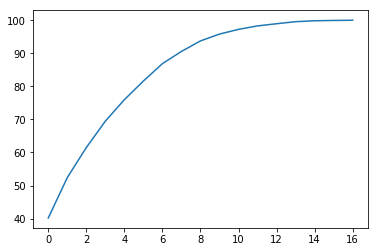

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# cleansing for PCA
data_pca = data.copy()
#data_pca = (data_pca[data_pca['Year'] == 2015])
data_pca.drop(columns=['Country', 'Year', 'LE_male', 'LE_female'], inplace=True)
# as we have categorial data in Income level, we must set the correct data type
data_pca['Income Level'] = data_pca['Income Level'].astype('category')
# assign value to each category value - Index(['H', 'L', 'LM', 'UM'], dtype='object')
data_pca['Income Level'].cat.categories = [4,1,2,3]
data_pca['Income Level'] = data_pca['Income Level'].astype(float)
# log transform GDP data
#data_pca['GDP'] = data_pca['GDP'].apply(np.log)
# finally fill up empty data with 0
data_pca.fillna(0, inplace=True)

X = scale(data_pca)

pca = PCA(n_components=len(data_pca.columns))
pca.fit(X)
#pca.components_

# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

#Cumulative variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=8)*100)

plt.plot(var1)

#df_pca = pd.DataFrame(pca.transform(data_pca), columns=data_pca.columns, index=data_pca.index)
#df_pca.head()


                                                    Year   LE_both   LE_male  \
Year                                                 NaN       NaN       NaN   
LE_both                                              NaN  1.000000  0.990147   
LE_male                                              NaN  0.990147  1.000000   
LE_female                                            NaN  0.992247  0.965426   
GDP per Capita                                       NaN  0.655252  0.681253   
Surface area (sq. km)                                NaN  0.063828  0.049715   
Population, total                                    NaN  0.011267  0.023841   
Population density (people per sq. km of land a...   NaN  0.175618  0.192384   
PM2.5 air pollution, mean annual exposure (micr...   NaN -0.453444 -0.399062   
Mortality caused by road traffic injury (per 10...   NaN -0.721556 -0.714566   
Intentional homicides (per 100,000 people)           NaN -0.196308 -0.234450   
Individuals using the Internet (% of pop

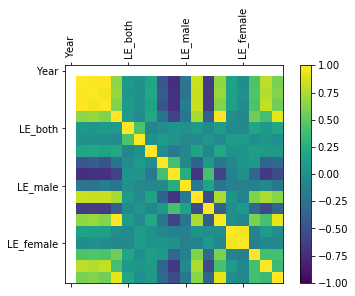

In [5]:
correlations = data.corr()
print(correlations)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

As we can see this is not satisfactoring result, there is no strong correlation between GDP and life expectancy at birth. So let's look at a scatter plot and check if there is at least some linear relation between these variables.

/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2016.0, right=2016.0
  'left=%s, right=%s') % (left, right))
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2016.0, top=2016.0
  'bottom=%s, top=%s') % (bottom, top))


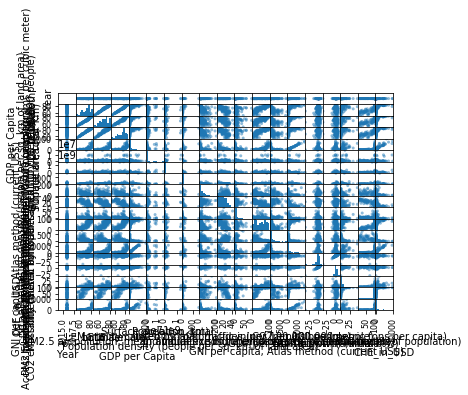

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()
# show simple scatter plot
#plt.ylabel('GDP')
#plt.xlabel('Life expectancy at birth, both sexes')
#plt.scatter(data["LE_both"], data["GDP"])

Next, we'll look at the correlation between 70 and older, maybe we can get better results.

                                                    Year   LE_both   LE_male  \
Year                                                 NaN       NaN       NaN   
LE_both                                              NaN  1.000000  0.966507   
LE_male                                              NaN  0.966507  1.000000   
LE_female                                            NaN  0.962875  0.862664   
GDP per Capita                                       NaN  0.755016  0.754519   
Surface area (sq. km)                                NaN -0.003440 -0.031825   
Population, total                                    NaN  0.007205  0.024200   
Population density (people per sq. km of land a...   NaN  0.195314  0.212698   
PM2.5 air pollution, mean annual exposure (micr...   NaN -0.283603 -0.158808   
Mortality caused by road traffic injury (per 10...   NaN -0.608481 -0.577251   
Intentional homicides (per 100,000 people)           NaN -0.310113 -0.352393   
Individuals using the Internet (% of pop

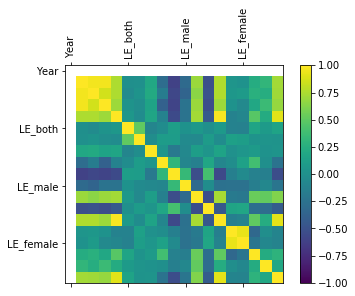

In [9]:
data_elderly = data[data.LE_both > 70]
correlations_elderly = data_elderly.corr()
print(correlations_elderly)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_elderly, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()